In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score



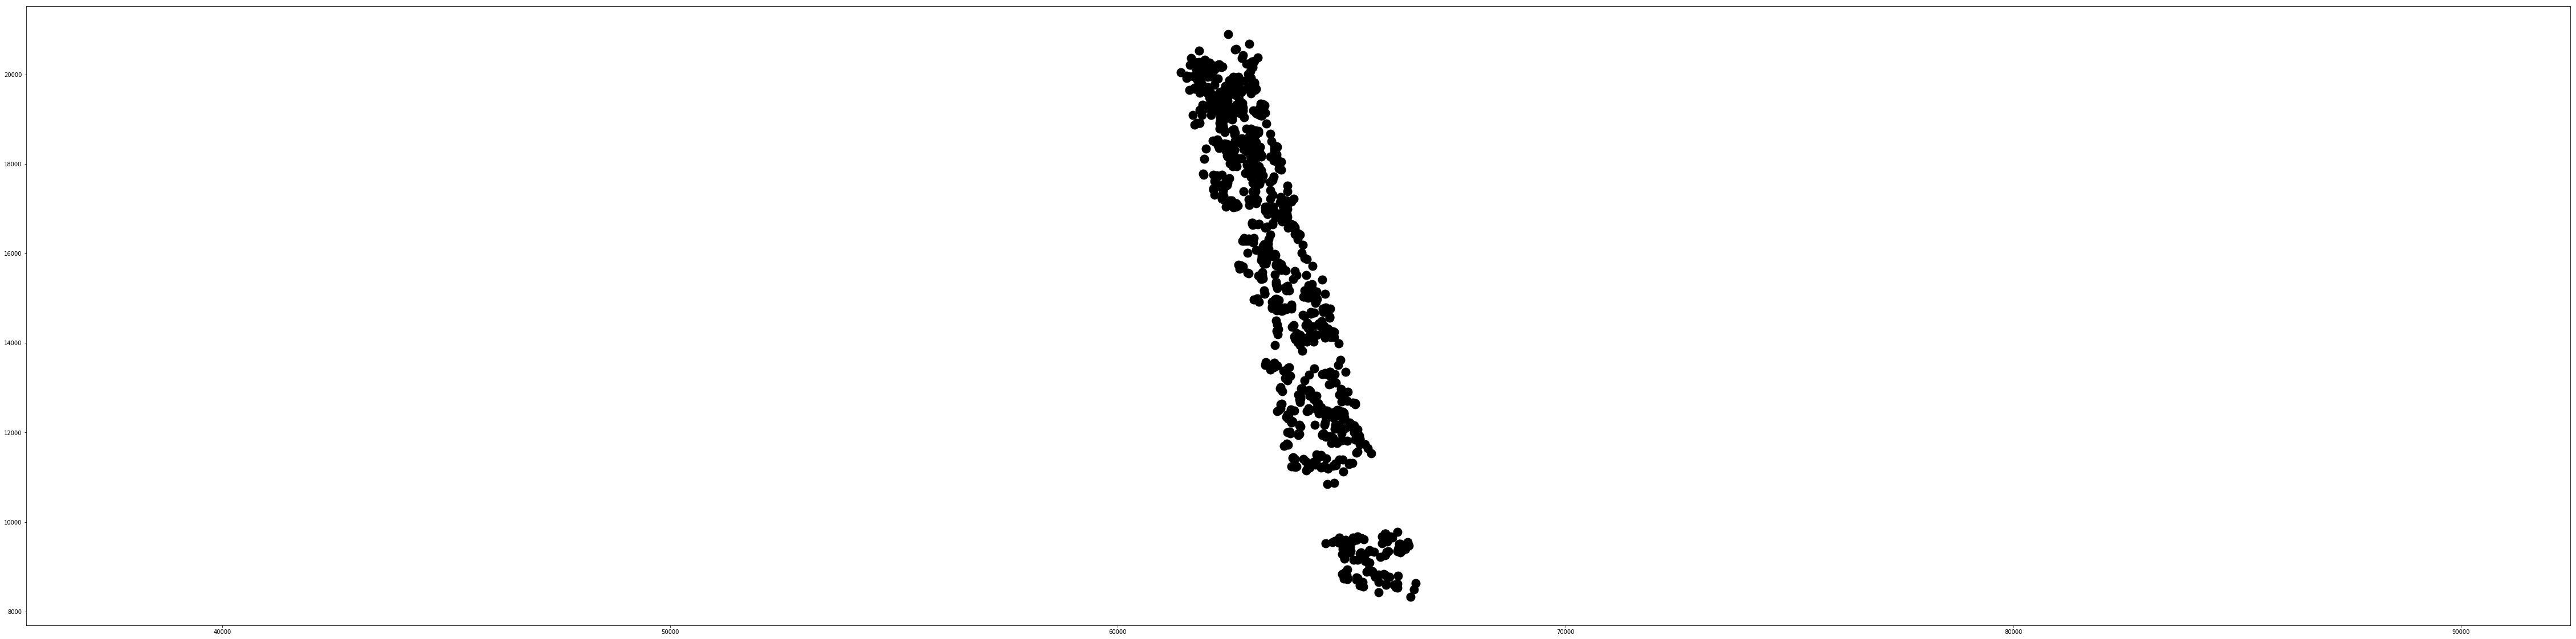

In [2]:
F = open('16_1124_HE_1.txt')
df=[]
for line in F:
    if (line!='\n') & (line!='# Caption\n'):
        try:
            line = line.replace(',','\t')
            Y = float(line.split('\t')[0])
            X = float(line.split('\t')[1].replace('\n',''))
            df.append([X,Y])
        except:
            print(line)

df=np.array(df)
plt.figure(figsize=(80,20))
plt.axis('equal')
plt.plot(df[:,0],df[:,1],'ko',markersize=15)
plt.show()

In [3]:
clustering = DBSCAN(eps=100, min_samples=3).fit_predict(df)

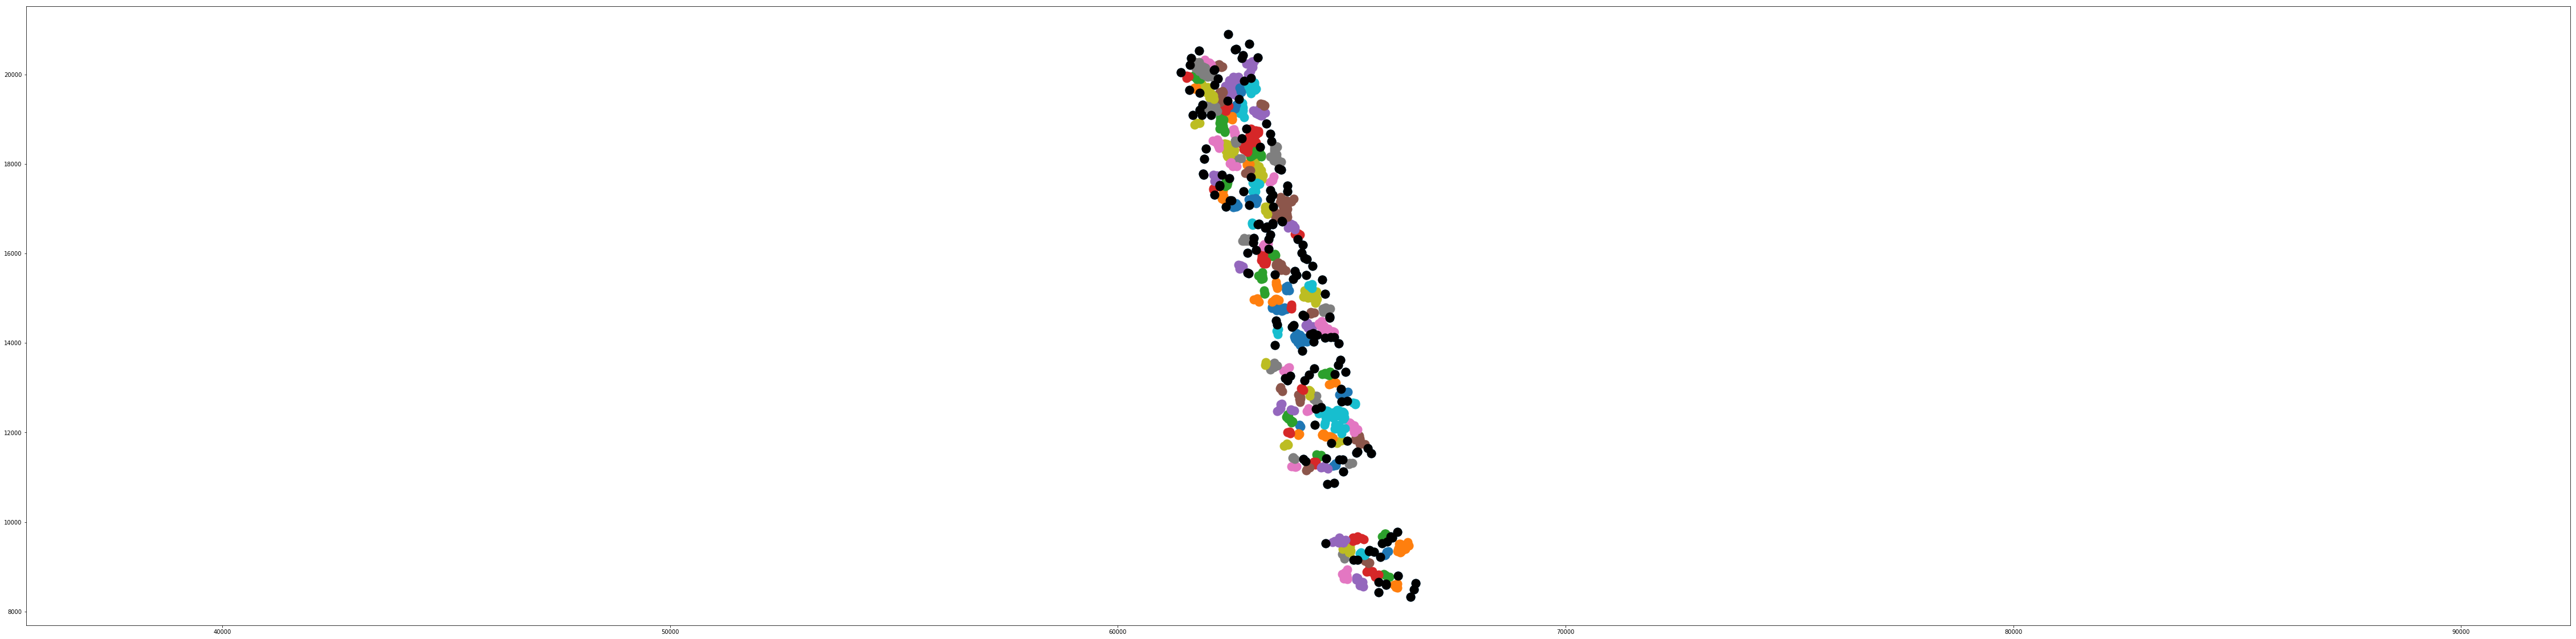

In [4]:
plt.figure(figsize=(80,20))
plt.axis('equal')
for i in np.unique(clustering):
    plt.plot(df[clustering[:] == i,0], df[clustering[:] == i,1], 'o', markersize=15)
plt.plot(df[clustering[:] == -1,0], df[clustering[:] == -1,1], 'ko', markersize=15)
plt.show()

In [12]:
print('число точек',len(clustering))
print('число кластеров',len(np.unique(clustering))-1)
df2 = pd.DataFrame([df[:,0],df[:,1],clustering])
df2=df2.T
df2=df2.drop(df2[df2[2] == -1].index)
print('среднее число кластеров',df2.groupby(2).size().mean())
print('площадь препарата',(df[:,0].max()-df[:,0].min())*(df[:,1].max()-df[:,1].min()))

число точек 848
число кластеров 112
среднее число кластеров 5.553571428571429
площадь препарата 54044447.636767395


In [ ]:
silhouette=[]
x=[]
for i in range(50,1500,5):
    clustering = DBSCAN(eps=i, min_samples=3).fit_predict(df)
    if (len(np.unique(clustering))!=1):
        x.append(i)
        silhouette.append(metrics.silhouette_score(df, clustering, metric='euclidean'))

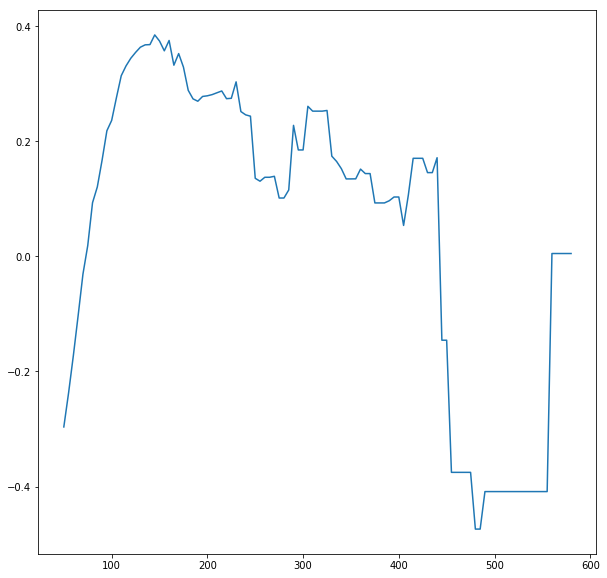

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(x,silhouette)
plt.show()

In [3]:
import os
files = os.listdir(path="./txt")
number_of_points=[]
number_of_clusters=[]
average_in_cluster=[]
squares=[]
for currentFile in files:
    F = open('txt/' + currentFile)
    
    df=[]
    #if currentFile == '16_1124_HE_1.txt':
    #    for line in F:
    #        if (line!='\n') & (line!='# Caption\n'):
    #            try:
    #                line = line.replace(',','\t')
    #                Y = float(line.split('\t')[0])
    #                X = float(line.split('\t')[1].replace('\n',''))
    #                df.append([X,Y])
    #            except:
    #                print(line) 
    for line in F:
            if line!='\n':
                try:
                    line = line.replace(',','.')
                    Y = float(line.split('\t')[0])
                    X = float(line.split('\t')[1].replace('\n',''))
                    df.append([X,Y])
                except:
                    continue
                    #print('not number:',line)
    df=np.array(df)
    print(currentFile)
    clustering = DBSCAN(eps=100, min_samples=3).fit_predict(df)
    print('число точек',len(clustering))
    print('число кластеров',len(np.unique(clustering))-1)
    df2 = pd.DataFrame([df[:,0],df[:,1],clustering])
    df2=df2.T
    df2=df2.drop(df2[df2[2] == -1].index)
    print('среднее число кластеров',df2.groupby(2).size().mean())
    print('площадь препарата',(df[:,0].max()-df[:,0].min())*(df[:,1].max()-df[:,1].min()))
    print('')
    number_of_points.append(len(clustering))
    number_of_clusters.append(len(np.unique(clustering))-1)
    average_in_cluster.append(df2.groupby(2).size().mean())
    squares.append((df[:,0].max()-df[:,0].min())*(df[:,1].max()-df[:,1].min()))
    plt.figure(figsize=(80,80))
    plt.axis('equal')
    for i in np.unique(clustering):
        plt.plot(df[clustering[:] == i,0], df[clustering[:] == i,1], 'o', markersize=15)
    plt.plot(df[clustering[:] == -1,0], df[clustering[:] == -1,1], 'ko', markersize=15)
    plt.title(currentFile)
    plt.savefig(currentFile+'.png')
    plt.close()

13_1488_HE_1.txt
число точек 445
число кластеров 57
среднее число кластеров 5.140350877192983
площадь препарата 53801280.05100771

13_1749_HE_1.txt
число точек 736
число кластеров 75
среднее число кластеров 7.8
площадь препарата 38580848.539614014

13_811_HE_1.txt
число точек 1846
число кластеров 162
среднее число кластеров 10.104938271604938
площадь препарата 133069245.73030676

14_1961_AE_2.txt
число точек 256
число кластеров 35
среднее число кластеров 4.714285714285714
площадь препарата 18984407.985277098

14_2618_AE_2.txt
число точек 99
число кластеров 6
среднее число кластеров 13.0
площадь препарата 2617662.6259286613

15_1254_HE_1.txt
число точек 57
число кластеров 8
среднее число кластеров 3.5
площадь препарата 28999633.39436527

15_2189_AE_1.txt
число точек 244
число кластеров 30
среднее число кластеров 4.066666666666666
площадь препарата 32248471.582240455

15_2407_HE_1.txt
число точек 843
число кластеров 71
среднее число кластеров 9.830985915492958
площадь препарата 28969251.

In [4]:
table=pd.DataFrame([number_of_points,number_of_clusters,average_in_cluster,squares],columns=files,
                   index=['всего точек','всего кластеров','среднее чилос точек в кластере','площадь препарата'])
table=table.T
#table.head(10)
writer = pd.ExcelWriter('bonemarrow.xlsx', engine='xlsxwriter')
table.to_excel(writer)
writer.save()